# BeautifulSoup


Beautiful Soup ist eine freie Screen Scraping-Software und eine Bibliothek für Python. Mit BS kann man einfach URLs öffnen und diese nach bestimmten Daten durchsuchen. Man nennt das [Scrapen](https://de.wikipedia.org/wiki/Screen_Scraping). Wir beginnen unser kleines Tutorial zunächst mit dem import der Bibliothek BeautifulSoup:

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

Danach öffnen wir den Browser mit einer spezifischen Instagram URL

In [2]:
driver = webdriver.Chrome()
driver.get("https://www.instagram.com/explore/tags/toniareal/")
time.sleep(2)

Im nächsten Schritt speichern wir den gesamten Sourcecode der Seite in einer Variablen, davor warten wir aber noch ein bisschen, damit die Seite auch wirklich geladen ist (Diesen Wert muss man evtl. anpassen)

In [3]:
source = driver.page_source

Mit einem print Statement überprüft man ob das geklappt hat

<!DOCTYPE html><!--[if lt IE 7]>      <html lang="en" class="no-js lt-ie9 lt-ie8 lt-ie7 not-logged-in client-root"> <![endif]--><!--[if IE 7]>         <html lang="en" class="no-js lt-ie9 lt-ie8 not-logged-in client-root"> <![endif]--><!--[if IE 8]>         <html lang="en" class="no-js lt-ie9 not-logged-in client-root"> <![endif]--><!--[if gt IE 8]><!--><html xmlns="http://www.w3.org/1999/xhtml" lang="en" class="js not-logged-in client-root"><!--<![endif]--><head><meta charset="utf-8" />
        <meta http-equiv="X-UA-Compatible" content="IE=edge" />

        <title>#toniareal • Instagram photos and videos</title>

        
        <meta name="robots" content="noimageindex, noarchive" />
        <meta name="mobile-web-app-capable" content="yes" />
        <meta name="theme-color" content="#000000" />
        <meta id="viewport" name="viewport" content="width=device-width, user-scalable=no, initial-scale=1, minimum-scale=1, maximum-scale=1" />
        

        <link rel="manifest" href=
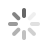
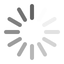
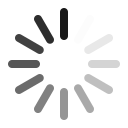

In [12]:
print source

Nachdem wir den Quelltext in einer Variable gespeichert haben, müssen wir diesen zuvor noch in eine "Beautifulsoup" verwandeln. Dies geschieht mit dem Kommando "BeautifulSoup(SOURCECODE,FORMAT), wobei SOURCECODE unsere Variable "source" ist, und "html.parser" dem BeautifulSoup Objekt mitteilt, dass es sich um ein html Dokument handelt

In [4]:
soup = BeautifulSoup(source,'html.parser')
print soup.title

<title>#toniareal • Instagram photos and videos</title>


Nun kann man einfach den Titel der Seite anzeigen lassen

In [14]:
print soup.title

<title>#toniareal • Instagram photos and videos</title>


Ohne den html tags <title></title> kann man die Funktion text verwenden:

In [15]:
print soup.title.text

#toniareal • Instagram photos and videos


#### Anzahl der Tags herausfinden

Jetzt kann man beginnen, in der Suppe nach gewissen Elementen zu suchen. Zum Beispiel der Anzahl der Tags. Im Sourcecode sehen wir, dass diese Zahl in einem <span> Element steck. Mit der Funktion "find" kann man dieses HTML Element auffinden:

In [8]:
print soup.find_all("span")

[<span id="react-root"><section class="_sq4bv _29u45"><main class="_8fi2q _2v79o" role="main"><article class="_jzhdd"><header class="_j5dqo"><h1 class="_kwqc3">#donaldtrump</h1><span class="_t98z6"><span class="_fd86t">3,604,738</span> posts</span></header><div class="_21z45"><h2 class="_nhglx">Top posts</h2><div class="_cmdpi"><div class="_70iju"><div class="_mck9w _gvoze _f2mse"><a href="/p/Bau7D56l0Qn/?tagged=donaldtrump"><div class="_e3il2"><div class="_4rbun"><img alt="Hello darkness my old friend" class="_2di5p" src="https://scontent-ams3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/c0.135.1080.1080/22857655_1983603685250012_5686784708495540224_n.jpg" style=""/></div><div class="_si7dy"></div></div></a></div><div class="_mck9w _gvoze _f2mse"><a href="/p/Bau5FbQFDah/?tagged=donaldtrump"><div class="_e3il2"><div class="_4rbun"><img alt="What's your opinion on the president \U0001f602\U0001f914? -\nFollow me @iamsebastianbetancur for more videos!\n-\nSong: @jaysavior - Shake\n

Das <span> Element welches die Anzahl der Tags anzeigt hat die Klasse "_bkw5z"

~~~
<span class="_bkw5z">323,447</span>
~~~


Jetzt könnte man die Suche noch weiter verfeinern, indem man der find Funktion noch mitteilt, welche Klasse man haben möchte. Die Schreibweise ist hierfür: (achtung: hier werden geschwungen Klammern verwendet. Mit den Tasten ALT+8 ALT+9 bekommt man diese auf einem Mac)

In [16]:
print soup.find('span',{'class':'_fd86t'})

<span class="_fd86t">6,750</span>


Man kann aber noch einen Schritt weitergehen und nur die Zahl (also alles zwischen den Tags anzeigen zu lassen). Hierfür gibt es die Funktion "text", die man einfach anhängen kann:

In [18]:
print soup.find('span',{'class':'_fd86t'}).text

6,750


Nun kann man diesen Wert in einer Variablen abspeichert und zum Beispiel das Komma-Zeichen mit der Funktion replace() ersetzen lassen

In [19]:
posts = soup.find('span',{'class':'_fd86t'}).text
postsOhneKomma = posts.replace(",","")
print posts
print postsOhneKomma

6,750
6750


Veruscht die einzelnen Zeilen in ein Skript zu packen und auszuführen. Versucht andere Suchwörter und seht ob das Skript nach wie vor funktioniert

### Bilder herunterladen

Die nächste Challenge ist alle Bilder zu einem gewissen Tag herunterzuladen. Wie würdet ihr das angehen?

Mit der Funktion find_all() können wir nach gewissen HTML Elementen suchen, z.B. auch nach Bildern (<img>). Diese Funktion gibt aber eine Liste zurück. Was heisst das? Eine Liste? Seht euch das print statement an

In [5]:
import urllib
import time
images = soup.find_all("img")
# einen ort zum abspeichern
# brauchen wir einen zaehler?
# for schleife

zaehler = 0
datei = open("instagram.md","w")
for image in images:
    zaehler = zaehler + 1
    #print zaehler
    datei.write(image.attrs["alt"].encode("utf-8"))
    datei.write("\n")
    datei.write("![Image caption](tmp/insta" + str(zaehler) + ".jpg)")
    linkZumBild = image.attrs["src"]
    urllib.urlretrieve(linkZumBild,"tmp/insta" + str(zaehler) + ".jpg")
    datei.write("\n")
    datei.write(r"\newpage")
    datei.write("\n")
    time.sleep(0.2)
datei.close()

Man sieht am Anfang der Textausgabe eine eckige Klammer danach viel Text aber man sieht, dass das <img> Tag mit Kommas von den anderen getrennt ist. Ganz zum Schluss gibt es wieder ein ]. Das schliesst die Liste. Blickt zurück auf das [Notebook mit den Python Basics](001_python_first_steps.ipynb). Mit einer for Schleife kann man nun die einzelnen Elemente der Liste auslesen. Probiert mal:

In [21]:
for image in images:
    print image
    print "---"


<img alt="We are looking forward to the opening of «Stefan Sagmeister. The Happy Show»! Don’t miss the chance to meet him in the museum. Tomorrow, 7pm. #THEHAPPYSHOW" class="_2di5p" src="https://scontent-ams3-1.cdninstagram.com/t51.2885-15/e15/c236.0.607.607/22802808_135234593797473_1236500580344528896_n.jpg" style=""/>
---
<img alt="#Throwback to Zurich times.  #timeflies #balletschool #toniareal" class="_2di5p" src="https://scontent-ams3-1.cdninstagram.com/t51.2885-15/e15/c144.0.352.352/19931758_242683039566013_1729962189164380160_n.jpg" style=""/>
---
<img alt="and now on the wall #poster #graphicdesign #typedesign #toniareal #hongkong" class="_2di5p" src="https://scontent-ams3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14704912_1674579639519884_1849886785694334976_n.jpg" style=""/>
---
<img alt="#switzerland #zürich 
#toniareal #zhdk" class="_2di5p" src="https://scontent-ams3-1.cdninstagram.com/t51.2885-15/s640x640/e15/22157876_1751954135106731_6907030839079469056_n.jpg" st

Wir sehen in jedem einzelnen <IMG> Tag gibt es verschiedene Attribute (der alt-text, die src = die eigentlich Adresse des Bildes, etc..). Diese Attribute kann man mit BeautifulSoup leicht herausfischen:

In [68]:
for image in images:
    print image.attrs["alt"]
    print "---"
    print image.attrs["src"]

He's not playin, give him his waffers yo😁😁
Tag a friend👇Double tap vid👆
✔By:Unknown  #hood #vine #crazy #stupid #shit #style #losers #guys #men #lol #lmao #yolo #funny #laugh #idiots #prank #joke #dumb #dare #fire #no #stop
---
https://scontent-frt3-1.cdninstagram.com/t51.2885-15/e15/14719122_571628909701852_526355440489988096_n.jpg?ig_cache_key=MTM3MjY1MjM3MzQ5MDkyMzkxMg%3D%3D.2
#memeposts1 #haraambanter #lol #lmao #lmfao #funnyshit #funny #shitistoofunny #thisshitisfunny #shit #realshit #nochill #laugh #crazy #meme #memes #like4like #likeforlike #thefuckery #comedy #hilarious #photooftheday #friend #instahappy #joke #epic #instagood #funnypictures #rofl
---
https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14718222_102343333578219_2377962656939114496_n.jpg?ig_cache_key=MTM3MTk0MDc4NzUxMjAxODY2Nw%3D%3D.2
Tag Your Friends!👥😂😂
---
https://scontent-frt3-1.cdninstagram.com/t51.2885-15/e15/14677387_332616337100690_7707433823306252288_n.jpg?ig_cache_key=MTM3MjU2OTAzOT

Wie kann man aber das Bild nun am Computer speichern? Dazu kann man die urllib Bibliothek verwenden. Diese hat nämlich eine Download-Funktion:

In [70]:
import urllib
urllib.urlretrieve("https://scontent-frt3-1.cdninstagram.com/t51.2885-15/s640x640/sh0.08/e35/14449337_142585999544841_1243380495182462976_n.jpg?ig_cache_key=MTM3MjAxMDUzMDk0NDc0ODE3Ng%3D%3D.2", "tmp_img/00001.jpg")

('tmp_img/00001.jpg', <httplib.HTTPMessage instance at 0x1079a9b00>)

Es müsste geklappt haben. Seht selbst in eurem Folder nach!

Die Challenge ist nun: Könnt ihr das urllibretrieve mit der Schleife verbinden?


### Bilder hochladen

Mit der Bibliothek pynstagram kann man Bilder auch automatisiert hochladen. Installieren kann man pynstagram über Github
~~~~
git clone https://github.com/facebookarchive/python-instagram
cd pynstagram
sudo python setup.py install
~~~~

Falls ihr git nicht installiert habt, dann kann man auch das Zip File herunterladen

~~~~
curl -LOk https://github.com/kdekooter/pynstagram/archive/master.zip
unzip master.zip
cd pynstagram-master/
sudo python setup.py install
~~~~

Danach hat man die pynstagram Bibliothek zur Verfügung, mit welcher man mit zwei Zeilen Code ein Bild hochladen kann. Zunächst erstellen wir eine Variable "client" in welcher wir das client Objekt zwischenspeichern. Bei der übergabe von pynstagram.client stehen in den Klammern zwei Texte; einerseits der Instagram Username und das Passwort.

In [ ]:
import pynstagram

client = pynstagram.client('zhdkbot', 'zdhk5craper')
client.upload('img/code.jpg', '#code #speakingcode #sandrabland')

### Ohne Selenium 

Zunächst wollen wir eine Website in unser Programm laden. Dazu brauchen wir den Befehl urlopen. Dieser Befehl ist Teil einer anderen Bibliothek (urllib2) 

In [113]:
from bs4 import BeautifulSoup
from urllib2 import urlopen

html = urlopen("http://www.nzz.ch")

Beim nächsten Schritt geben wir mal die ganzen Webseite mitsamt Sourcecode im Terminal aus. Dazu kann man die Funktion readlines() benutzen. (Achtung: diese funktioniert nur einmal!)

['<!doctype html> <html lang="de" itemscope itemtype="http://schema.org/NewsArticle" itemid="http://www.nzz.ch/"> <head><meta http-equiv="X-UA-Compatible" content="IE=edge" /> <title>NZZ News \xe2\x80\x93 Aktuelle Nachrichten - Neue Z\xc3\xbcrcher Zeitung</title> <script type="application/ld+json">\n', ' {\n', ' "@context" : "http://schema.org",\n', ' "@type" : "Organization",\n', ' "name" : "NZZ Neue Z\xc3\xbcrcher Zeitung",\n', ' "url" : "http://www.nzz.ch",\n', ' "logo" : {\n', ' "@type": "ImageObject",\n', ' "url": "http://www.nzz.ch/logo.png",\n', ' "width": 413,\n', ' "height": 60\n', ' },\n', ' "contactPoint" : [{\n', ' "@type" : "ContactPoint",\n', ' "telephone" : "+41-44-2581000",\n', ' "contactType" : "customer service"\n', ' }],\n', ' "sameAs" : [ "https://www.facebook.com/nzz",\n', ' "https://www.twitter.com/nzz",\n', ' "https://www.youtube.com/channel/UCK1aTcR0AckQRLTlK0c4fuQ",\n', ' "https://www.linkedin.com/company/neue-zurcher-zeitung",\n', ' "https://plus.google.com/+n
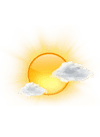

In [114]:
print html.readlines()

Wie kann man ein aber nur die Headlines aus dem ganzen HTML-Chaos herausfischen? Hier ist BeautifulSoup hilfreich. Aber man muss zunächst den ganzen HTML Code in eine "BeautifulSoup" umwandeln. Das geht so:


In [115]:
from bs4 import BeautifulSoup
from urllib2 import urlopen

html = urlopen("http://www.nzz.ch")
soup = BeautifulSoup(html,"html.parser")

<!DOCTYPE doctype html>
<html itemid="http://www.nzz.ch/" itemscope="" itemtype="http://schema.org/NewsArticle" lang="de">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   NZZ News – Aktuelle Nachrichten - Neue Zürcher Zeitung
  </title>
  <script type="application/ld+json">
   {
 "@context" : "http://schema.org",
 "@type" : "Organization",
 "name" : "NZZ Neue Zürcher Zeitung",
 "url" : "http://www.nzz.ch",
 "logo" : {
 "@type": "ImageObject",
 "url": "http://www.nzz.ch/logo.png",
 "width": 413,
 "height": 60
 },
 "contactPoint" : [{
 "@type" : "ContactPoint",
 "telephone" : "+41-44-2581000",
 "contactType" : "customer service"
 }],
 "sameAs" : [ "https://www.facebook.com/nzz",
 "https://www.twitter.com/nzz",
 "https://www.youtube.com/channel/UCK1aTcR0AckQRLTlK0c4fuQ",
 "https://www.linkedin.com/company/neue-zurcher-zeitung",
 "https://plus.google.com/+nzz/",
 "http://www.freebase.com/m/041b43"]
 }
  </script>
  <meta content="text/html; charset=utf-8" http
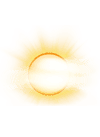

In [5]:
print soup


Das sieht jetzt nach wie vor recht unordentlich aus. Mit der Funktion prettify() wird es ein wenig besser formatiert ausgegeben.

<!DOCTYPE doctype html>
<html itemid="http://www.nzz.ch/" itemscope="" itemtype="http://schema.org/NewsArticle" lang="de">
 <head>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <title>
   NZZ News – Aktuelle Nachrichten - Neue Zürcher Zeitung
  </title>
  <script type="application/ld+json">
   {
 "@context" : "http://schema.org",
 "@type" : "Organization",
 "name" : "NZZ Neue Zürcher Zeitung",
 "url" : "http://www.nzz.ch",
 "logo" : {
 "@type": "ImageObject",
 "url": "http://www.nzz.ch/logo.png",
 "width": 413,
 "height": 60
 },
 "contactPoint" : [{
 "@type" : "ContactPoint",
 "telephone" : "+41-44-2581000",
 "contactType" : "customer service"
 }],
 "sameAs" : [ "https://www.facebook.com/nzz",
 "https://www.twitter.com/nzz",
 "https://www.youtube.com/channel/UCK1aTcR0AckQRLTlK0c4fuQ",
 "https://www.linkedin.com/company/neue-zurcher-zeitung",
 "https://plus.google.com/+nzz/",
 "http://www.freebase.com/m/041b43"]
 }
  </script>
  <meta content="text/html; charset=utf-8" http
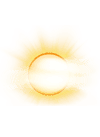

In [6]:
print soup.prettify()

Man kann das soup Objekt aber nach spezifischen HTML Tags durchsuchen (a für links, p für paragraphen, span, div, etc...)

In [116]:
print soup.find_all("h2")

[<h2 class="title title--teaser"><div class="title__catchline">Ein Jahr Fl\xfcchtlingskrise</div><div class="title__name">Kein Zur\xfcck zur Tagesordnung</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">Ein Jahr Fl\xfcchtlingskrise</div><div class="title__name">\xabEinen Asyl-Notfall gab es nie\xbb</div></h2>, <h2 class="title title--teaser"><div class="title__name">Was heute wichtig ist</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">Kampf gegen den IS</div><div class="title__name">Baghdadi beschw\xf6rt den Endkampf</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">T\xfcrkischer Aussenminister zur EU</div><div class="title__name">\xabLeg dich nicht mit einer Schlange ins Bett\xbb</div></h2>, <h2 class="title title--teaser"><div class="title__catchline">Alternative Finanzierungsmodelle</div><div class="title__name">Baue Schulhaus \u2013 suche Investor</div></h2>, <h2 class="title title--teaser"><div class="title

Das sind nach wie vor ganz viele h2 (headlines). Man kann die Suche aber noch weiter verfeinern. Zum Beispiel, interessieren uns nur <h2> tags, die die Klasse (class) "title" haben. 

In [117]:
results = soup.find_all("h2",{"class":"title--teaser"})

## oder man sucht nur nach der catchline
resultsHeadline = soup.find_all("div",{"class":"title__catchline"})

In [118]:
for result in resultsHeadline:
    print result.text

Ein Jahr Flüchtlingskrise
Ein Jahr Flüchtlingskrise
Kampf gegen den IS
Türkischer Aussenminister zur EU
Alternative Finanzierungsmodelle
Julia Gerber Rüeggs Austritt aus der SP
Staatskrise in Südkorea
Stagnierende Telekom-Erträge
Selbstfahrendes Auto
Sportlicher Leiter des FCZ
Wenn die Jungen übernehmen
Quiz
Limitierte Lesenszeit
Neue Prüderie
US-Präsidentschaftswahlen
Präsidentschaftswahl in Ohio
111 schöne Schweizer Kinos
Christian Berzin verrät seine liebsten Gourmet-Lokale
Leseempfehlung
Wenn die Jungen übernehmen
Zwei Generationen, zwei Kulturen
Tausch von Zahlungsströmen
Strafverfolgung
Generationenfrage
Fluchtgut
Organisierte Gewalt in Zentralamerika
Politischer Dialog
Der Südsudan und die Uno
Australiens Braunkohlekraftwerk Hazelwood
Aus der Arbeitswelt
Schweizer Grossbanken
Digital Business
Dynamik der Digitalisierung
Konsumenten im Fokus
Krise in Venezuela
MAAT-Kunsthalle von Amanda Levete
FC Basel - Paris Saint-Germain 1:2
Great Barrier Reef
Anlagebetrug
Niederländische Degi

Das ganze Programm sieht nun so aus (Speichert es mal in einem seperaten File z.B. newsfeed.py ab). (Achtung: wegen den Umlauten und Sonderzeichen muss man den Text noch mit dem Standard [UTF-8](https://de.wikipedia.org/wiki/UTF-8) "encoden" ansonsten gibts eine Fehlermeldung im Terminal)

In [ ]:
# -*- coding: utf-8 -*-
from bs4 import BeautifulSoup
from urllib2 import urlopen

html = urlopen("http://www.nzz.ch")
soup = BeautifulSoup(html,"html.parser")

results = soup.find_all("h2",{"class":"title--teaser"})

for result in results:
    print result.text.encode('utf-8')
    print " --- "

Man kann nun den Text im Terminal ausgeben, wenn man das Programm so aufruft:

~~~
python newsfeed.py
~~~

Die Textausgabe kann man einfach in ein Text2Speech Programm "pipen". Dazu gibt es den vertikalen Strich | (ALT+7) mit welchem die Ausgabe eines Programms (in unserem Fall python) in ein zweites Programm "pipen" kann. Seht was passiert:

~~~
python newsfeed.py | say -
~~~

Jede Headline wird nun gesprochen. Man kann die Stimme mit dem Parameter -v ändern, z. B. deutscher Akzent

~~~~
python newsfeed.py | say -v Anna
~~~~